# Introduction
This notebook explores the loan dataset retrieved from the U.S. Small Business Administration website.

**What is the SBA 504 Loan?**

The 504 Loan Program provides long-term, fixed rate financing for major fixed assets that promote business growth and job creation.

504 loans are available through Certified Development Companies (CDCs), SBA's community-based partners who regulate nonprofits and promote economic development within their communities. CDCs are certified and regulated by SBA.

The maximum loan amount for a 504 loan is 5.5 million. For certain energy projects, the borrower can receive a 504 loan for up to 5.5 million per project, for up to three projects not to exceed 16.5 million total.

**Dataset Description**

| Field Name                | Definition                                                                                                                                                                                                                                                                                                    |
|---------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| AsOfDate                  | Date when the data was recorded                                                                                                                                                                                                                                                                                |
| Program                   | Indicator of whether loan was approved under SBA's 7(a) or 504 loan program                                                                                                                                                                                                                                    |
| BorrName                  | Borrower name                                                                                                                                                                                                                                                                                                  |
| BorrStreet                | Borrower street address                                                                                                                                                                                                                                                                                        |
| BorrCity                  | Borrower city                                                                                                                                                                                                                                                                                                  |
| BorrState                 | Borrower state                                                                                                                                                                                                                                                                                                 |
| BorrZip                   | Borrower zip code                                                                                                                                                                                                                                                                                              |
| CDC_Name                  | Name of CDC that the loan is currently assigned to                                                                                                                                                                                                                                                             |
| CDC_Street                | CDC street address                                                                                                                                                                                                                                                                                             |
| CDC_City                  | CDC city                                                                                                                                                                                                                                                                                                       |
| CDC_State                 | CDC state                                                                                                                                                                                                                                                                                                       |
| CDC_Zip                   | CDC zip code                                                                                                                                                                                                                                                                                                   |
| ThirdPartyLender_Name     | Name of third party lender                                                                                                                                                                                                                                                                                     |
| ThirdPartyLender_City     | Third party lender city                                                                                                                                                                                                                                                                                        |
| ThirdPartyLender_State    | Third party lender state                                                                                                                                                                                                                                                                                       |
| ThirdPartyDollars         | Third party loan amount                                                                                                                                                                                                                                                                                        |
| GrossApproval             | SBA/CDC loan amount                                                                                                                                                                                                                                                                                            |
| ApprovalDate              | Date the loan was approved                                                                                                                                                                                                                                                                                     |
| ApprovalFiscalYear        | Fiscal year the loan was approved                                                                                                                                                                                                                                                                              |
| FirstDisbursementDate     | Date of first loan disbursement (if available)                                                                                                                                                                                                                                                                 |
| DeliveryMethod            | Specific delivery method loan was approved under.  See SOP 50 10 5 for definitions and rules for each delivery method. 504 Delivery Methods: • 504 = Regular 504 • 504REFI = 504 Refinance (inactive) • ALP = Accredited Lenders Program • PCLP = Premier Certified Lenders                                  |
| subpgmdesc                | Subprogram description - specific subprogram loan was approved under.  See SOP 50 10 5 for definitions and rules for each subprogram.                                                                                                                                                                         |
| TermInMonths              | Length of loan term                                                                                                                                                                                                                                                                                            |
| NaicsCode                 | North American Industry Classification System (NAICS) code                                                                                                                                                                                                                                                     |
| NaicsDescription          | North American Industry Classification System (NAICS) description                                                                                                                                                                                                                                               |
| FranchiseCode             | Franchise Code                                                                                                                                                                                                                                                                                                 |
| FranchiseName             | Franchise Name (if applicable)                                                                                                                                                                                                                                                                                 |
| ProjectCounty             | County where project occurs                                                                                                                                                                                                                                                                                    |
| ProjectState              | State where project occurs                                                                                                                                                                                                                                                                                     |
| SBADistrictOffice         | SBA district office                                                                                                                                                                                                                                                                                            |
| CongressionalDistrict     | Congressional district where project occurs                                                                                                                                                                                                                                                                     |
| BusinessType              | Borrower Business Type - Individual, Partnership, or Corporation                                                                                                                                                                                                                                                |
| BusinessAge               | SBA began collecting the following business age information in fiscal year 2018: • Change of Ownership • Existing or more than 2 years old • New Business or 2 years or less • Startup, Loan Funds will Open Business                                                                                        |
| LoanStatus                | Current status of loan: • NOT FUNDED = Undisbursed • PIF = Paid In Full • CHGOFF = Charged Off • CANCLD = Cancelled • EXEMPT = The status of loans that have been disbursed but have not been cancelled, paid in full, or charged off are exempt from disclosure under FOIA Exemption 4                      |
| PaidInFullDate            | Date loan was paid in full (if applicable)                                                                                                                                                                                                                                                                     |
| ChargeOffDate             | Date SBA charged off loan (if applicable)                                                                                                                                                                                                                                                                      |
| GrossChargeOffAmount      | Total SBA/CDC loan balance charged off                                                                                                                                                                                                                                                                         |
| Jobs Supported            | Total Jobs Created + Jobs Retained as reported by lender on SBA Loan Application. SBA does not review, audit, or validate these numbers - they are simply self-reported, good faith estimates by the lender.                                                                                                   |


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

C:\Users\kenim\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Helper Functions

In [2]:
def money_format(value, pos):
    """Convert the tick label to a format like '$2B'."""
    value = float(value)
    if value >= 1e9:  # Billion
        value_str = '${:,.1f}B'.format(value * 1e-9)
    elif value >= 1e6:  # Million
        value_str = '${:,.1f}M'.format(value * 1e-6)
    elif value >= 1e3:  # Thousand
        value_str = '${:,.1f}K'.format(value * 1e-3)
    else:
        value_str = '${:,.0f}'.format(value)
    return value_str

formatter = FuncFormatter(money_format)

# Load the Data

In [3]:
data = pd.read_csv('./data/sme-loan-data-2010-present.csv', encoding='ISO-8859-1')
data.head()

C:\Users\kenim\AppData\Local\Temp\ipykernel_8100\3928763402.py:1: DtypeWarning: Columns (32,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/sme-loan-data-2010-present.csv', encoding='ISO-8859-1')


,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,...,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,JobsSupported
0,20231231,504,Turning Brook,300 & 400 Oxbow Dr 100 Villa,Alpena,MI,49707,Michigan Certified Development,"3737 Coolidge Road, 2nd Floor",East Lansing,...,MI,MICHIGAN DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,12/31/2012,NaN,0,14
1,20231231,504,HAMMES SEED INC,1123 120th Rd..,Seneca,KS,66538,"Frontier Financial Partners, I",1512 W 6th Ave.,Emporia,...,KS,KANSAS CITY DISTRICT OFFICE,2.0,CORPORATION,NaN,EXEMPT,NaN,NaN,0,1
2,20231231,504,"Rocket Express, LLC",1122 Blue Laker Boulevard Nort,Twin falls,ID,83301,Region IV Development Corporat,202 Falls Avenue,Twin Falls,...,ID,BOISE DISTRICT OFFICE,2.0,CORPORATION,NaN,PIF,9/30/2015,NaN,0,8
3,20231231,504,Martin Harper P.C.,3 E. Ramona Avenue.,Colorado springs,CO,80905,Pikes Peak Regional Developmen,322 S. Cascade Avenue,Colorado Springs,...,CO,COLORADO DISTRICT OFFICE,5.0,CORPORATION,NaN,PIF,11/30/2020,NaN,0,1
4,20231231,504,"Shield Security Systems, L.L.C",7456 West 5th Avenue.,Lakewood,CO,80226,B:Side Capital,3350 Brighton Blvd,Denver,...,CO,COLORADO DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,5/31/2016,NaN,0,40


In [4]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102157 entries, 0 to 102156
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   AsOfDate                102157 non-null  int64  
 1   Program                 102157 non-null  int64  
 2   BorrName                102157 non-null  object 
 3   BorrStreet              102157 non-null  object 
 4   BorrCity                102157 non-null  object 
 5   BorrState               102157 non-null  object 
 6   BorrZip                 102157 non-null  int64  
 7   CDC_Name                102156 non-null  object 
 8   CDC_Street              102156 non-null  object 
 9   CDC_City                102156 non-null  object 
 10  CDC_State               102156 non-null  object 
 11  CDC_Zip                 102156 non-null  float64
 12  ThirdPartyLender_Name   102036 non-null  object 
 13  ThirdPartyLender_City   102014 non-null  object 
 14  ThirdPartyLender_Sta

## DataType Conversion

In [5]:
# Converting datatypes
df2 = df.copy()

df2['AsOfDate'] = pd.to_datetime(df['AsOfDate'], format='%Y%m%d') # conversion to datetime
df2['Program'] = df['Program'].apply(lambda x: str(x)) # conversion to string
df2['BorrName'] = df['BorrName'].apply(lambda x: x.title()) # conversion to title case
df2['BorrStreet'] = df['BorrStreet'].apply(lambda x: x.title()) # conversion to title case
df2['BorrCity'] = df['BorrCity'].apply(lambda x: x.title()) # conversion to title case
df2['BorrState'] = df['BorrState'].apply(lambda x: x.upper()) # conversion to upper case
df2['CDC_Name'] = df['CDC_Name'].apply(lambda x: str(x).title() if pd.notnull(x) else x) # conversion to title case
df2['CDC_Street'] = df['CDC_Street'].apply(lambda x: str(x).title() if pd.notnull(x) else x) # conversion to title case
df2['CDC_City'] = df['CDC_City'].apply(lambda x: str(x).title() if pd.notnull(x) else x) # conversion to title case
df2['CDC_State'] = df['CDC_State'].apply(lambda x: x.upper() if pd.notnull(x) else x) # conversion to upper case
df2['CDC_Zip'] = df['CDC_Zip'].apply(lambda x: int(x) if pd.notnull(x) else x) # conversion to integer
df2['ThirdPartyLender_Name'] = df['ThirdPartyLender_Name'].apply(lambda x: x.title() if pd.notnull(x) else x) # conversion to title case
df2['ThirdPartyLender_City'] = df['ThirdPartyLender_City'].apply(lambda x: x.title() if pd.notnull(x) else x) # conversion to title case
df2['ThirdPartyLender_State'] = df['ThirdPartyLender_State'].apply(lambda x: x.upper() if pd.notnull(x) else x) # conversion to upper case
df2['ThirdPartyDollars'] = df['ThirdPartyDollars'].apply(lambda x: float(x)) # conversion to float
df2['GrossApproval'] = df['GrossApproval'].apply(lambda x: float(x)) # conversion to float
df2['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], format='%m/%d/%Y') # conversion to datetime
df2['FirstDisbursementDate'] = pd.to_datetime(df['FirstDisbursementDate'], format='%m/%d/%Y') # conversion to datetime
df2['NaicsCode'] = df['NaicsCode'].apply(lambda x: str(int(x)) if pd.notnull(x) else x) # conversion to string
df2['NaicsDescription'] = df['NaicsDescription'].apply(lambda x: x.title() if pd.notnull(x) else x) # conversion to title case
df2['FranchiseName'] = df['FranchiseName'].apply(lambda x: x.title() if pd.notnull(x) else x) # conversion to title case
df2['ProjectCounty'] = df['ProjectCounty'].apply(lambda x: x.title() if pd.notnull(x) else x) # conversion to title case
df2['ProjectState'] = df['ProjectState'].apply(lambda x: x.upper() if pd.notnull(x) else x) # conversion to upper case
df2['SBADistrictOffice'] = df['SBADistrictOffice'].apply(lambda x: x.title() if pd.notnull(x) else x) # conversion to title case
df2['CongressionalDistrict'] = df['CongressionalDistrict'].apply(lambda x: int(x) if pd.notnull(x) else x) # conversion to integer
df2['BusinessType'] = df['BusinessType'].apply(lambda x: x.title() if pd.notnull(x) else x) # conversion to title case
df2['PaidInFullDate'] = pd.to_datetime(df['PaidInFullDate'], format='%m/%d/%Y') # conversion to datetime
df2['ChargeOffDate'] = pd.to_datetime(df['ChargeOffDate'], format='%m/%d/%Y') # conversion to datetime
df2['GrossChargeOffAmount'] = df['GrossChargeOffAmount'].apply(lambda x: float(x)) # conversion to float

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102157 entries, 0 to 102156
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   AsOfDate                102157 non-null  datetime64[ns]
 1   Program                 102157 non-null  object        
 2   BorrName                102157 non-null  object        
 3   BorrStreet              102157 non-null  object        
 4   BorrCity                102157 non-null  object        
 5   BorrState               102157 non-null  object        
 6   BorrZip                 102157 non-null  int64         
 7   CDC_Name                102156 non-null  object        
 8   CDC_Street              102156 non-null  object        
 9   CDC_City                102156 non-null  object        
 10  CDC_State               102156 non-null  object        
 11  CDC_Zip                 102156 non-null  float64       
 12  ThirdPartyLender_Name   102036

## Data Exploration

In [6]:
df2.describe()

,BorrZip,CDC_Zip,ThirdPartyDollars,GrossApproval,ApprovalFiscalYear,TermInMonths,CongressionalDistrict,GrossChargeOffAmount,JobsSupported
count,102157.000000,102156.000000,1.021500e+05,1.021570e+05,102157.000000,102157.000000,102151.000000,1.021570e+05,102157.000000
mean,56996.719383,57238.188320,1.064192e+06,7.866205e+05,2016.545875,255.133833,10.048487,4.347114e+03,10.583670
std,30767.040612,30876.073541,1.385593e+06,8.524325e+05,4.260409,38.552830,11.762194,7.410392e+04,17.725704
min,601.000000,918.000000,0.000000e+00,5.400000e+02,2010.000000,7.000000,0.000000,0.000000e+00,0.000000
25%,32804.000000,32303.000000,3.286712e+05,2.640000e+05,2013.000000,240.000000,2.000000,0.000000e+00,2.000000
50%,58078.000000,58104.000000,6.250000e+05,4.950000e+05,2017.000000,240.000000,5.000000,0.000000e+00,5.000000
75%,86404.000000,87109.000000,1.230000e+06,9.570000e+05,2021.000000,300.000000,13.000000,0.000000e+00,12.000000
max,99901.000000,99212.000000,3.029974e+07,5.500000e+06,2024.000000,300.000000,53.000000,4.486077e+06,763.000000


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102157 entries, 0 to 102156
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   AsOfDate                102157 non-null  datetime64[ns]
 1   Program                 102157 non-null  object        
 2   BorrName                102157 non-null  object        
 3   BorrStreet              102157 non-null  object        
 4   BorrCity                102157 non-null  object        
 5   BorrState               102157 non-null  object        
 6   BorrZip                 102157 non-null  int64         
 7   CDC_Name                102156 non-null  object        
 8   CDC_Street              102156 non-null  object        
 9   CDC_City                102156 non-null  object        
 10  CDC_State               102156 non-null  object        
 11  CDC_Zip                 102156 non-null  float64       
 12  ThirdPartyLender_Name   102036

In [8]:
df2.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,...,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,JobsSupported
0,2023-12-31,504,Turning Brook,300 & 400 Oxbow Dr 100 Villa,Alpena,MI,49707,Michigan Certified Development,"3737 Coolidge Road, 2Nd Floor",East Lansing,...,MI,Michigan District Office,1.0,Corporation,NaN,PIF,2012-12-31,NaT,0.0,14
1,2023-12-31,504,Hammes Seed Inc,1123 120Th Rd..,Seneca,KS,66538,"Frontier Financial Partners, I",1512 W 6Th Ave.,Emporia,...,KS,Kansas City District Office,2.0,Corporation,NaN,EXEMPT,NaT,NaT,0.0,1
2,2023-12-31,504,"Rocket Express, Llc",1122 Blue Laker Boulevard Nort,Twin Falls,ID,83301,Region Iv Development Corporat,202 Falls Avenue,Twin Falls,...,ID,Boise District Office,2.0,Corporation,NaN,PIF,2015-09-30,NaT,0.0,8
3,2023-12-31,504,Martin Harper P.C.,3 E. Ramona Avenue.,Colorado Springs,CO,80905,Pikes Peak Regional Developmen,322 S. Cascade Avenue,Colorado Springs,...,CO,Colorado District Office,5.0,Corporation,NaN,PIF,2020-11-30,NaT,0.0,1
4,2023-12-31,504,"Shield Security Systems, L.L.C",7456 West 5Th Avenue.,Lakewood,CO,80226,B:Side Capital,3350 Brighton Blvd,Denver,...,CO,Colorado District Office,1.0,Corporation,NaN,PIF,2016-05-31,NaT,0.0,40


In [9]:
df2['LoanStatus'].unique()

array(['PIF', 'EXEMPT', 'CANCLD', 'CHGOFF', nan, 'NOT FUNDED'],
      dtype=object)

## Note

1. There are various loan statuses ('Paid in full', 'Charged Off', 'Exempt', 'Cancelled', or 'Not funded', however we are only interested in approved loans that have been 'Paid in full', 'Exempt', or 'Charged Off'.

2. The Approval Date which is the acutal date the loan was approved can be different when it comes to the Approval Fiscal Year which is the Accounting Year used by the Agency to record the transaction therefore new columns Year and Month to represent the actual approval Year and Month will be created.

In [10]:
# Filtering dataset
df3 = df2[df2['LoanStatus'].isin(['PIF', 'CHGOFF', 'EXEMPT'])].copy()

# creating new Year and Month column
df3['Year'] = df3['ApprovalDate'].dt.year
df3['Month'] = df3['ApprovalDate'].dt.month
df3['Quarter'] = df3['ApprovalDate'].dt.quarter

# Loan Distribution and Trends

### 1. What is the distribution of loan amounts across different states or regions?

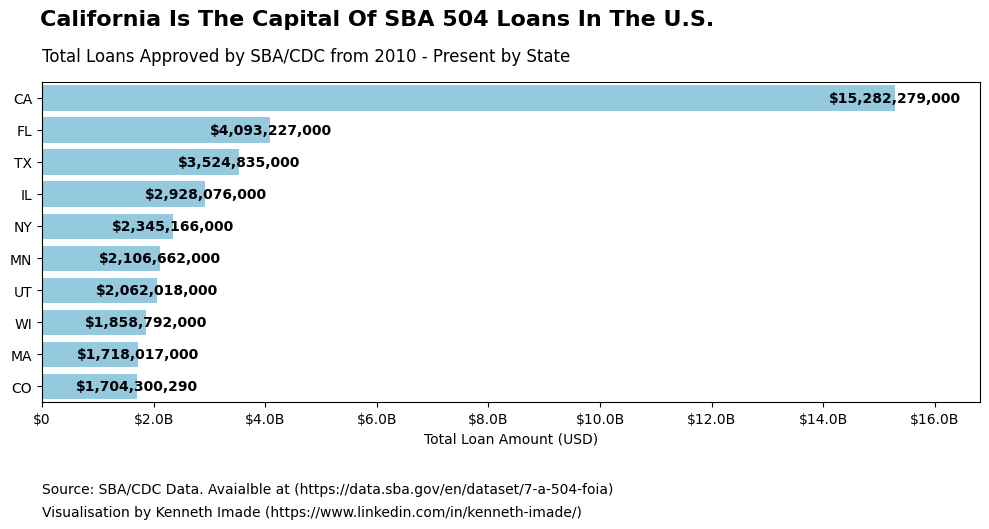

In [11]:
df_1 = df3.groupby(['BorrState'])['GrossApproval'].sum().reset_index().sort_values(by='GrossApproval', ascending=False).head(10)

plt.figure(figsize=(10, 6))

color = 'skyblue'

ax = sns.barplot(data=df_1, y='BorrState', x='GrossApproval', color=color)

plt.gca().xaxis.set_major_formatter(formatter)
plt.ylabel('')
plt.xlabel('Total Loan Amount (USD)')
plt.suptitle('California Is The Capital Of SBA 504 Loans In The U.S.', ha='left', x=0.045, fontsize=16, fontweight='bold')
plt.title('Total Loans Approved by SBA/CDC from 2010 - Present by State', loc='left', pad=15)

max_gross_approval = df_1['GrossApproval'].max()
ax.set_xlim(0, max_gross_approval * 1.1)

# Adding data labels inside the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x() + width + 0.02,  # x position, slightly right of the bar end
             p.get_y() + p.get_height() / 2,  # y position, at the center of the bar
             '${:,.0f}'.format(width),  # text label, formatted as a float with commas
             ha='center',  # horizontal alignment
             va='center', fontweight='bold')  # vertical alignment

plt.text(0, -0.25, 'Source: SBA/CDC Data. Avaialble at (https://data.sba.gov/en/dataset/7-a-504-foia)', ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0, -0.32, 'Visualisation by Kenneth Imade (https://www.linkedin.com/in/kenneth-imade/)', ha='left', va='top', transform=plt.gca().transAxes)

# Adjust layout to make sure all labels and titles fit into the figure
plt.tight_layout(rect=[0, 0.03, 1, 1])

plt.savefig('./plots/top-10-states-by-gross-approval-amount.png', dpi=500, bbox_inches='tight')
plt.show()

### 2. How have loan amounts and terms changed over time?

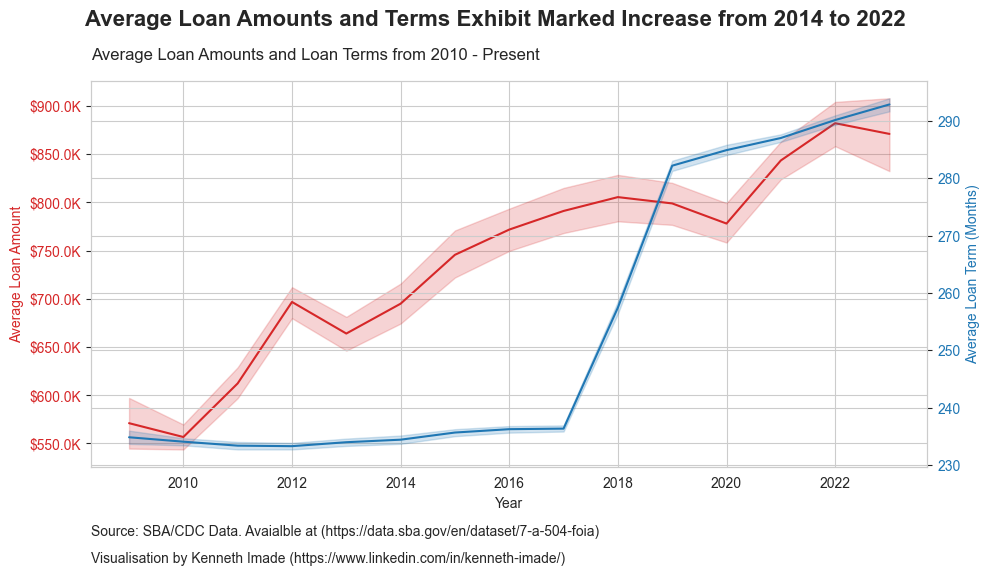

In [12]:
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

plt.gca().yaxis.set_major_formatter(formatter)

plt.suptitle('Average Loan Amounts and Terms Exhibit Marked Increase from 2014 to 2022', ha='left', x=0.09, fontsize=16, fontweight='bold')
plt.title('Average Loan Amounts and Loan Terms from 2010 - Present', loc='left', pad=15)


color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Loan Amount', color=color)
sns.lineplot(data=df3, x='Year', y='GrossApproval', ax=ax1, color=color, estimator='mean')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:blue'
ax2.set_ylabel('Average Loan Term (Months)', color=color)
sns.lineplot(data=df3, x='Year', y='TermInMonths', ax=ax2, color=color, estimator='mean')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlabel('')

plt.text(0, -0.15, 'Source: SBA/CDC Data. Avaialble at (https://data.sba.gov/en/dataset/7-a-504-foia)', ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0, -0.22, 'Visualisation by Kenneth Imade (https://www.linkedin.com/in/kenneth-imade/)', ha='left', va='top', transform=plt.gca().transAxes)

# Adjust layout to make sure all labels and titles fit into the figure
plt.tight_layout()
plt.savefig('./plots/avg-loan-amount-and-terms-from-2010-to-present.png', dpi=500, bbox_inches='tight')
plt.show()

### 3. Are there any seasonal trends in loan issuance?

In [13]:
df4 = df3.copy()

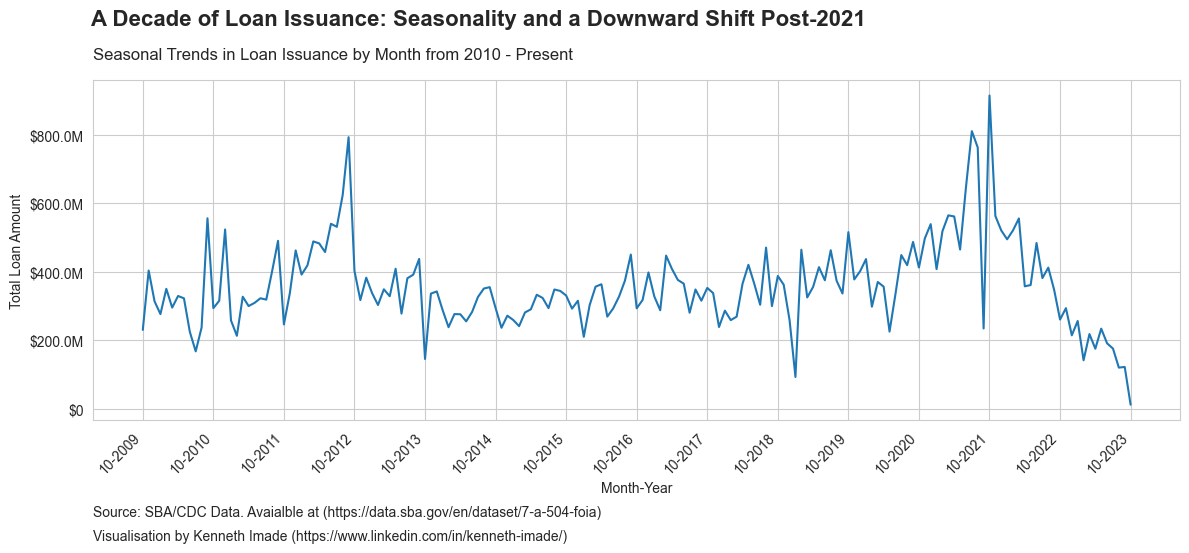

In [14]:
# monthly trends
monthly_trends = df4.groupby(['Year', 'Month']).agg(TotalLoans=('GrossApproval', 'sum')).reset_index()

monthly_trends['Month-Year'] = monthly_trends['Month'].astype(str) + '-' + monthly_trends['Year'].astype(str)

plt.figure(figsize=(12, 6))
plt.gca().yaxis.set_major_formatter(formatter)
plot = sns.lineplot(data=monthly_trends, x='Month-Year', y='TotalLoans')

plt.suptitle('A Decade of Loan Issuance: Seasonality and a Downward Shift Post-2021', ha='left', x=0.08, fontsize=16, fontweight='bold')
plt.title('Seasonal Trends in Loan Issuance by Month from 2010 - Present', loc='left', pad=15)


plt.xlabel('Month-Year')
plt.ylabel('Total Loan Amount')

# Adjusting x-ticks
# Get every nth label for a cleaner look, n could be 6 for biannual or 12 for annual, depending on your dataset size
n = 12  # Example: Displaying one label per year if you have monthly data
x_ticks = plot.get_xticks()
# Set new x-ticks
plot.set_xticks(x_ticks[::n])
# Set new x-tick labels
plot.set_xticklabels(monthly_trends['Month-Year'].iloc[::n], rotation=45, ha='right')

plt.text(0, -0.25, 'Source: SBA/CDC Data. Avaialble at (https://data.sba.gov/en/dataset/7-a-504-foia)', ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0, -0.32, 'Visualisation by Kenneth Imade (https://www.linkedin.com/in/kenneth-imade/)', ha='left', va='top', transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('./plots/monthly-trend-of-loan-issuance-from-2010-to-present.png', dpi=500, bbox_inches='tight')
plt.show()

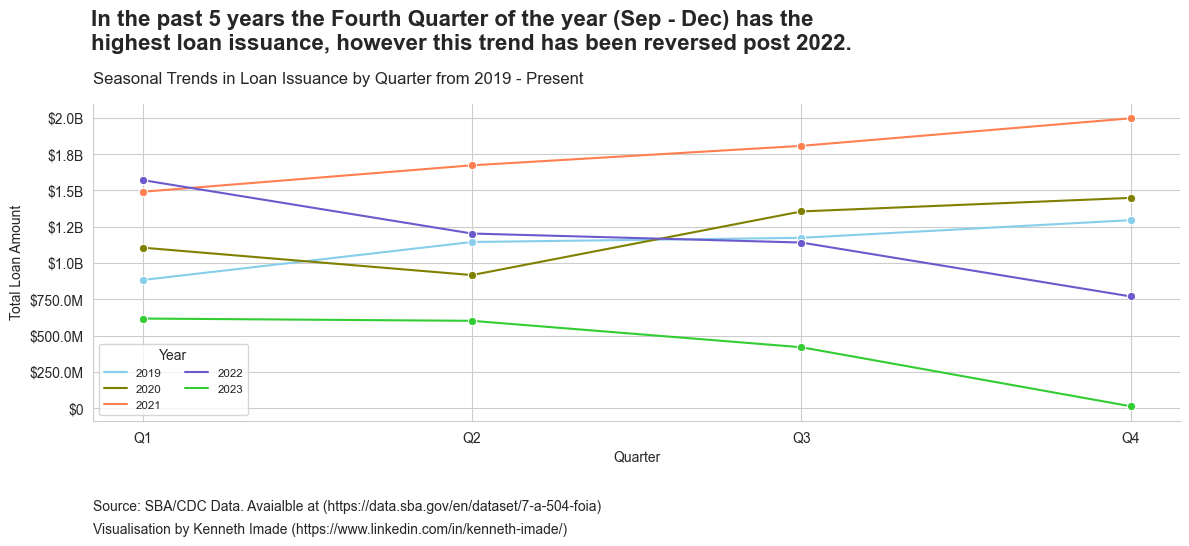

In [15]:
quarterly_trends = df4.groupby(['Year', 'Quarter']).agg(TotalLoans=('GrossApproval', 'sum')).reset_index().tail(20)

plt.figure(figsize=(12, 6))

plt.gca().yaxis.set_major_formatter(formatter)

color_map = {
    2019: 'skyblue',
    2020: 'olive',
    2021: 'coral',
    2022: 'slateblue',
    2023: 'limegreen',
}

sns.despine()
sns.lineplot(data=quarterly_trends, x='Quarter', y='TotalLoans', hue='Year', marker='o', palette=color_map)

plt.suptitle('In the past 5 years the Fourth Quarter of the year (Sep - Dec) has the\nhighest loan issuance, however this trend has been reversed post 2022.', ha='left', x=0.08, fontsize=16, fontweight='bold')
plt.title('Seasonal Trends in Loan Issuance by Quarter from 2019 - Present', loc='left', pad=15)

plt.xlabel('Quarter')
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.ylabel('Total Loan Amount')
plt.text(0, -0.25, 'Source: SBA/CDC Data. Avaialble at (https://data.sba.gov/en/dataset/7-a-504-foia)', ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0, -0.32, 'Visualisation by Kenneth Imade (https://www.linkedin.com/in/kenneth-imade/)', ha='left', va='top', transform=plt.gca().transAxes)
plt.legend(title='Year', fontsize='small', loc='lower left', ncols=2)
plt.tight_layout()
plt.savefig('./plots/quarterly-trend-of-loan-issuance-from-2019-to-present.png', dpi=500, bbox_inches='tight')
plt.show()

# Borrower Demographics

## 1. What are the common industries or sectors that apply for 504 loans?

In [16]:
df4['BusinessType'].unique()

array(['Corporation', 'Individual', 'Partnership'], dtype=object)

In [17]:
df4['NaicsCode'] = df4['NaicsCode'].astype(str)

In [18]:
'623312'[5]

'2'

In [19]:
df4['Sector'] = df4['NaicsCode'].apply(lambda x: x[:2] if len(x) > 1 else None)
df4['SubSector'] = df4['NaicsCode'].apply(lambda x: x[2] if len(x) > 2 else None)
df4['IndustryGroup'] = df4['NaicsCode'].apply(lambda x: x[3] if len(x) > 3 else None)
df4['NAICSIndustry'] = df4['NaicsCode'].apply(lambda x: x[4] if len(x) > 4 else None)
df4['NationalIndustry'] = df4['NaicsCode'].apply(lambda x: x[5] if len(x) > 5 else None)

In [20]:
df4[['NaicsCode', 'Sector', 'SubSector', 'IndustryGroup', 'NAICSIndustry', 'NationalIndustry']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82103 entries, 0 to 101090
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NaicsCode         82103 non-null  object
 1   Sector            82103 non-null  object
 2   SubSector         82103 non-null  object
 3   IndustryGroup     81804 non-null  object
 4   NAICSIndustry     81804 non-null  object
 5   NationalIndustry  81804 non-null  object
dtypes: object(6)
memory usage: 6.4+ MB


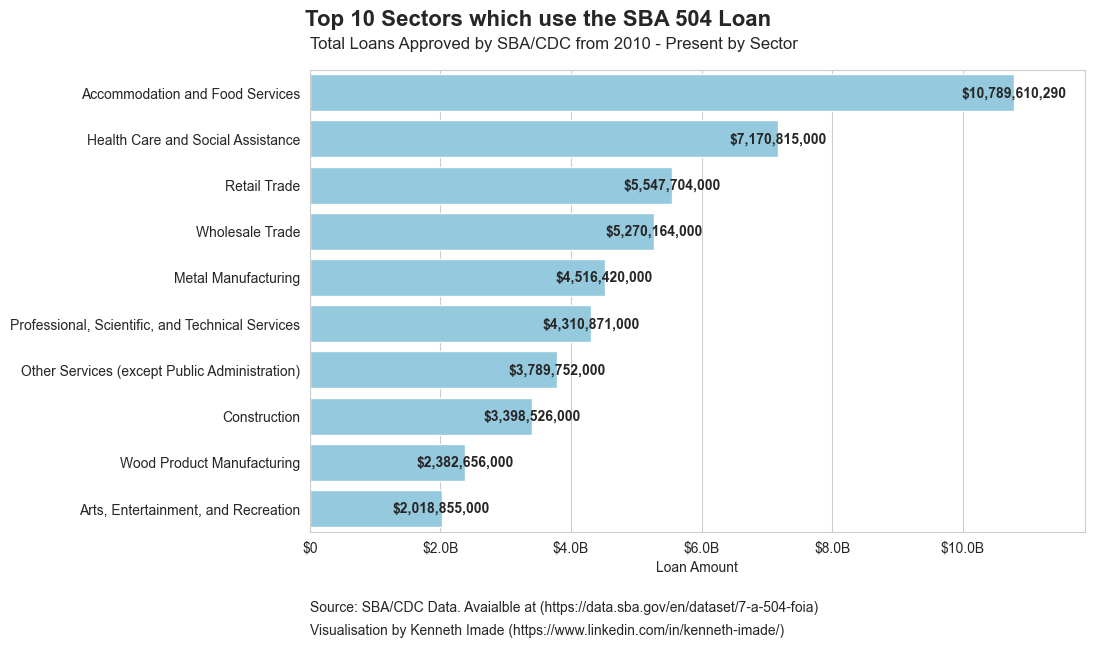

In [21]:
# Grouping data by 'Sector' and summing 'GrossApproval', then getting top 10
top_borrowers_by_industry = df4.groupby('Sector')['GrossApproval'].sum().reset_index().sort_values('GrossApproval', ascending=False).head(10)

# Setting up the figure size
plt.figure(figsize=(10, 6))

# Defining the color for the bars
color = 'skyblue'

# Creating a barplot
ax = sns.barplot(data=top_borrowers_by_industry, y='Sector', x='GrossApproval', color=color)

# Formatting the x-axis to display the gross approval amounts in a more readable format
plt.gca().xaxis.set_major_formatter(formatter)

# Setting up title and labels
plt.suptitle('Top 10 Sectors which use the SBA 504 Loan', ha='left', x=0.12, fontsize=16, fontweight='bold')
plt.title('Total Loans Approved by SBA/CDC from 2010 - Present by Sector', loc='left', pad=15)
plt.xlabel('Loan Amount')
plt.ylabel('')

# Set the y-axis tick labels to the industry names, matched by order in the DataFrame
industry_names = ['Accommodation and Food Services', 'Health Care and Social Assistance', 'Retail Trade', 'Wholesale Trade',
                  'Metal Manufacturing', 'Professional, Scientific, and Technical Services', 'Other Services (except Public Administration)',
                  'Construction', 'Wood Product Manufacturing', 'Arts, Entertainment, and Recreation']

# Assuming industry_names matches the order in 'top_borrowers_by_industry'
plt.yticks(range(10), industry_names)

# Setting the x-axis limits to make space for the data labels
max_gross_approval = top_borrowers_by_industry['GrossApproval'].max()
ax.set_xlim(0, max_gross_approval * 1.1)

# Adding data labels inside the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x() + width + 0.02,  # x position, slightly right of the bar end
             p.get_y() + p.get_height() / 2,  # y position, at the center of the bar
             '${:,.0f}'.format(width),  # text label, formatted as a float with commas
             ha='center',  # horizontal alignment
             va='center', fontweight='bold')  # vertical alignment

plt.text(0, -0.15, 'Source: SBA/CDC Data. Avaialble at (https://data.sba.gov/en/dataset/7-a-504-foia)', ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0, -0.20, 'Visualisation by Kenneth Imade (https://www.linkedin.com/in/kenneth-imade/)', ha='left', va='top', transform=plt.gca().transAxes)


plt.savefig('./plots/top-10-sectors-which-use-sba-loans.png', dpi=500, bbox_inches='tight')

plt.show()


## 2. How does the borrower's industry impact the loan amount and terms?

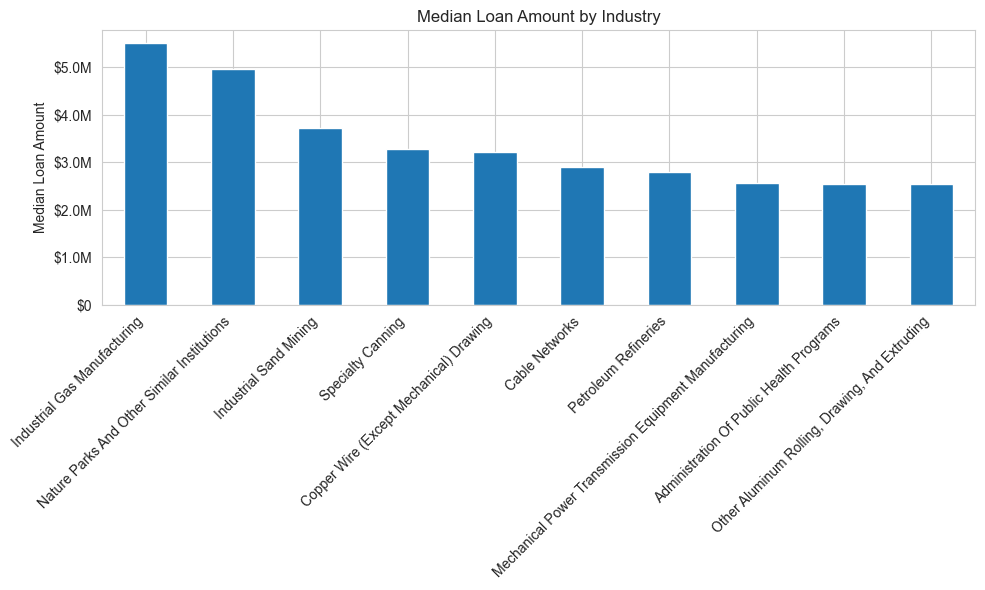

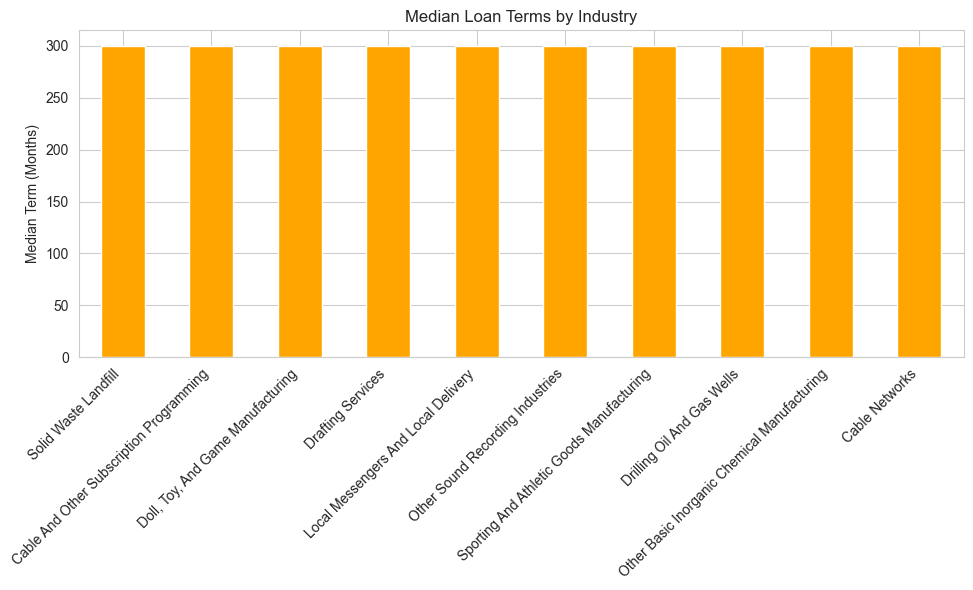

In [22]:
# Industry impact on loan amount
plt.figure(figsize=(10, 6))
plt.gca().yaxis.set_major_formatter(formatter)
df4.groupby('NaicsDescription')['GrossApproval'].median().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Median Loan Amount by Industry')
plt.ylabel('Median Loan Amount')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Industry impact on loan terms
plt.figure(figsize=(10, 6))
df4.groupby('NaicsDescription')['TermInMonths'].median().sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Median Loan Terms by Industry')
plt.ylabel('Median Term (Months)')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Loan Impact

## 1. How does the loan size correlate with the number of jobs created or retained?

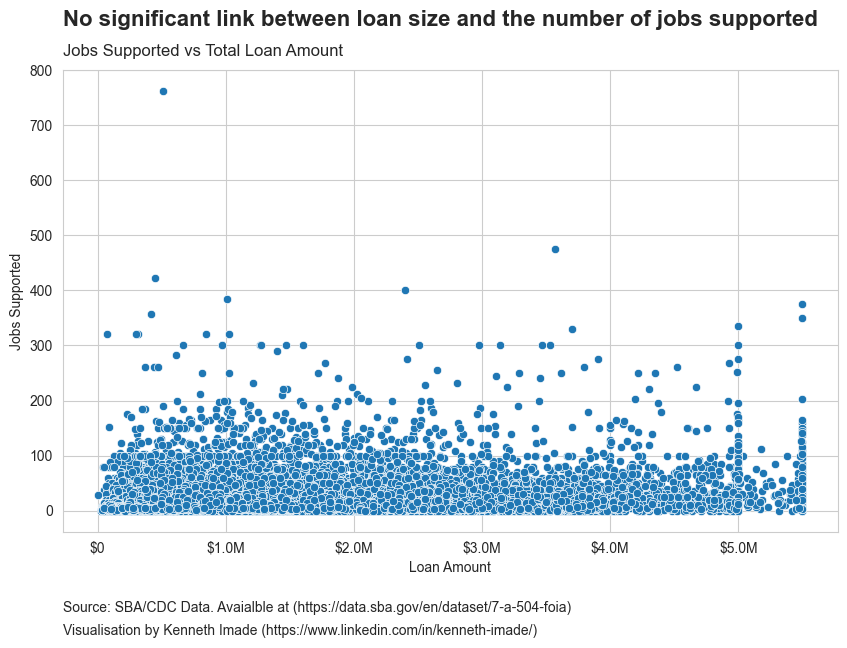

In [23]:
loan_size_to_jobs_correlation = df4[['GrossApproval', 'JobsSupported']]

plt.figure(figsize=(10, 6))

sns.scatterplot(data=loan_size_to_jobs_correlation, x='GrossApproval', y='JobsSupported')
plt.gca().xaxis.set_major_formatter(formatter)

plt.suptitle('No significant link between loan size and the number of jobs supported', ha='left', x=0.125, 
             fontsize=16, fontweight='bold')
plt.title('Jobs Supported vs Total Loan Amount', loc='left', pad=10)
plt.xlabel('Loan Amount')
plt.ylabel('Jobs Supported')

plt.text(0, -0.15, 'Source: SBA/CDC Data. Avaialble at (https://data.sba.gov/en/dataset/7-a-504-foia)', ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0, -0.20, 'Visualisation by Kenneth Imade (https://www.linkedin.com/in/kenneth-imade/)', ha='left', va='top', transform=plt.gca().transAxes)

plt.savefig('./plots/correlation-between-loan-size-and-number-of-jobs.png', dpi=500, bbox_inches='tight')

plt.show()

# Lender Analysis

## Which lenders are the most active in providing 504 loans?

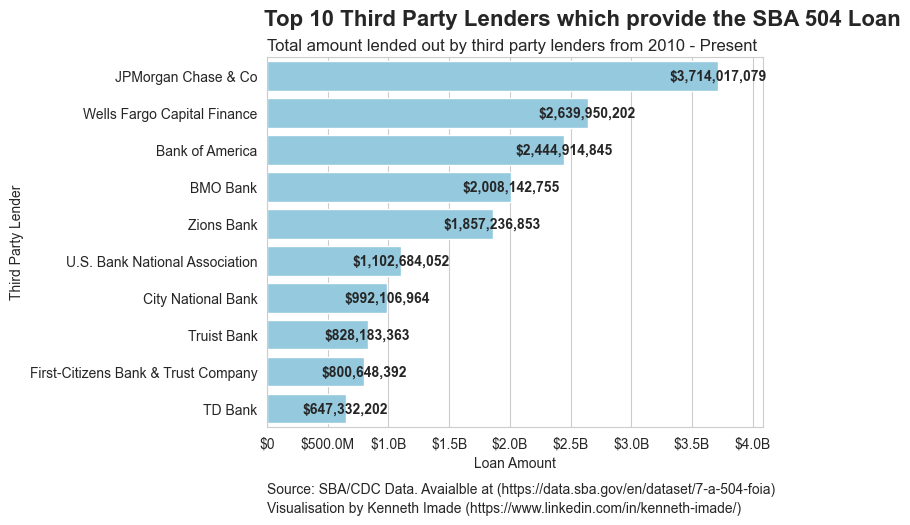

In [24]:
top_lenders = df4[['ThirdPartyLender_Name', 'ThirdPartyDollars']].groupby('ThirdPartyLender_Name')['ThirdPartyDollars'].sum().reset_index().sort_values('ThirdPartyDollars', ascending=False).head(10)

ax = sns.barplot(data=top_lenders, y='ThirdPartyLender_Name', x='ThirdPartyDollars', color='skyblue')
plt.gca().xaxis.set_major_formatter(formatter)

plt.ylabel('Third Party Lender')
plt.xlabel('Loan Amount')
plt.suptitle('Top 10 Third Party Lenders which provide the SBA 504 Loan', ha='left', x=0.12, fontsize=16, fontweight='bold')
plt.title('Total amount lended out by third party lenders from 2010 - Present', loc='left', pad=5)

# Set the y-axis tick labels to the industry names, matched by order in the DataFrame
bank_names = ['JPMorgan Chase & Co', 'Wells Fargo Capital Finance', 'Bank of America', 'BMO Bank', 'Zions Bank', 
                  'U.S. Bank National Association', 'City National Bank', 'Truist Bank', 'First-Citizens Bank & Trust Company',
                 'TD Bank']
plt.yticks(range(10), bank_names)

# Setting the x-axis limits to make space for the data labels
max_gross_approval = top_lenders['ThirdPartyDollars'].max()
ax.set_xlim(0, max_gross_approval * 1.1)

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x() + width + 0.02,  # x position, slightly right of the bar end
             p.get_y() + p.get_height() / 2,  # y position, at the center of the bar
             '${:,.0f}'.format(width),  # text label, formatted as a float with commas
             ha='center',  # horizontal alignment
             va='center', fontweight='bold')  # vertical alignment

plt.text(0, -0.15, 'Source: SBA/CDC Data. Avaialble at (https://data.sba.gov/en/dataset/7-a-504-foia)', ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0, -0.20, 'Visualisation by Kenneth Imade (https://www.linkedin.com/in/kenneth-imade/)', ha='left', va='top', transform=plt.gca().transAxes)

plt.savefig('./plots/top-10-third-party-lenders.png', dpi=500, bbox_inches='tight')

plt.show()

## Is there a concentration of lenders in certain regions or industries?

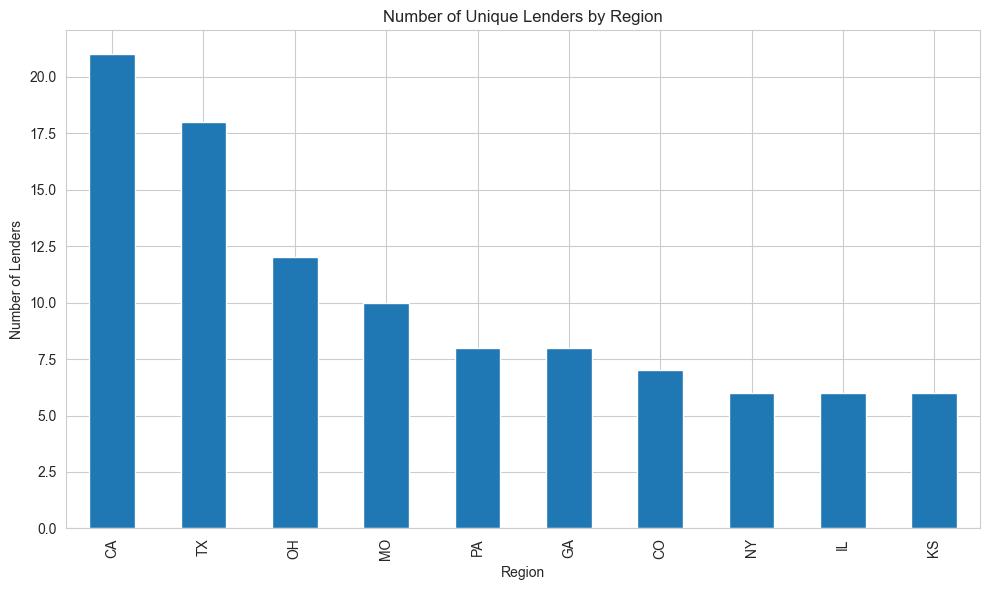

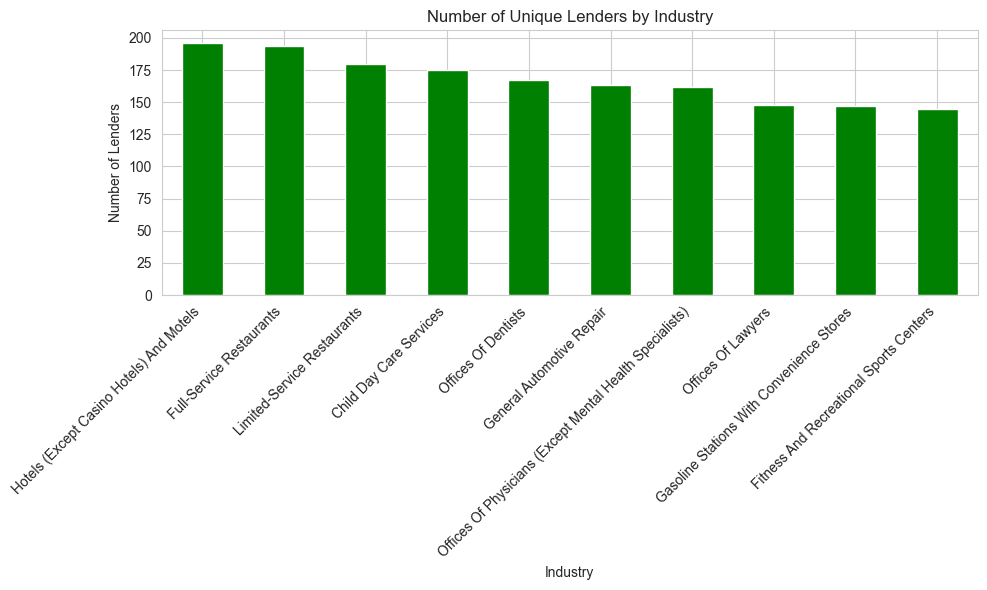

In [25]:
# Concentration of lenders by region
plt.figure(figsize=(10, 6))
df4.groupby('CDC_State')['CDC_Name'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Number of Unique Lenders by Region')
plt.ylabel('Number of Lenders')
plt.xlabel('Region')
plt.tight_layout()

# Concentration of lenders by industry
plt.figure(figsize=(10, 6))
df4.groupby('NaicsDescription')['CDC_Name'].nunique().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Number of Unique Lenders by Industry')
plt.ylabel('Number of Lenders')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


## How do loan terms and amounts differ among lenders?

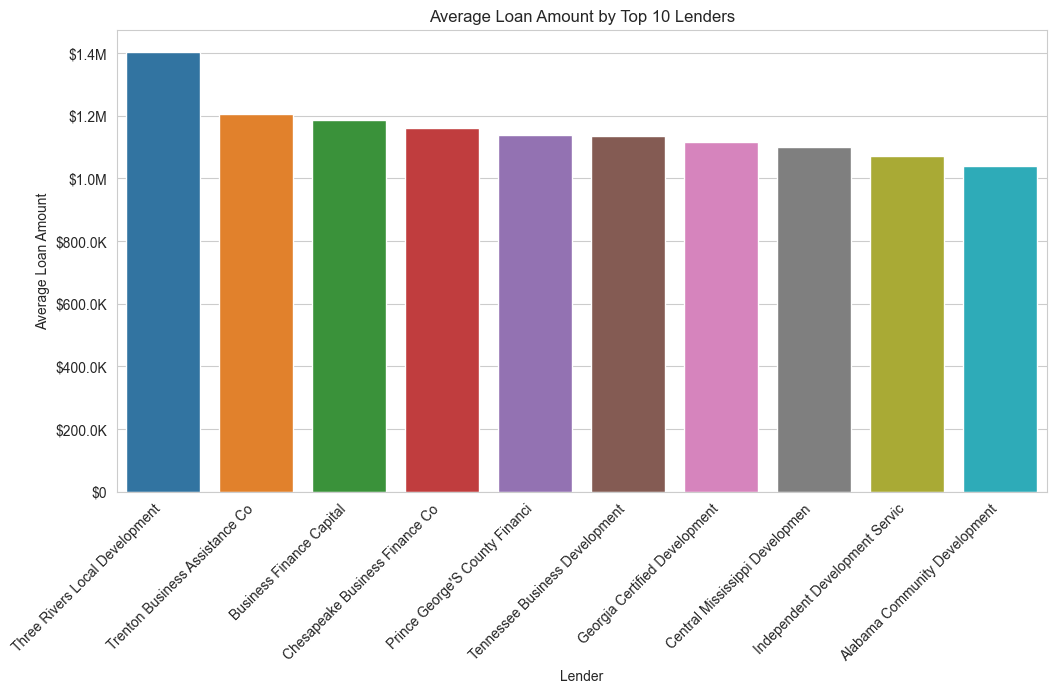

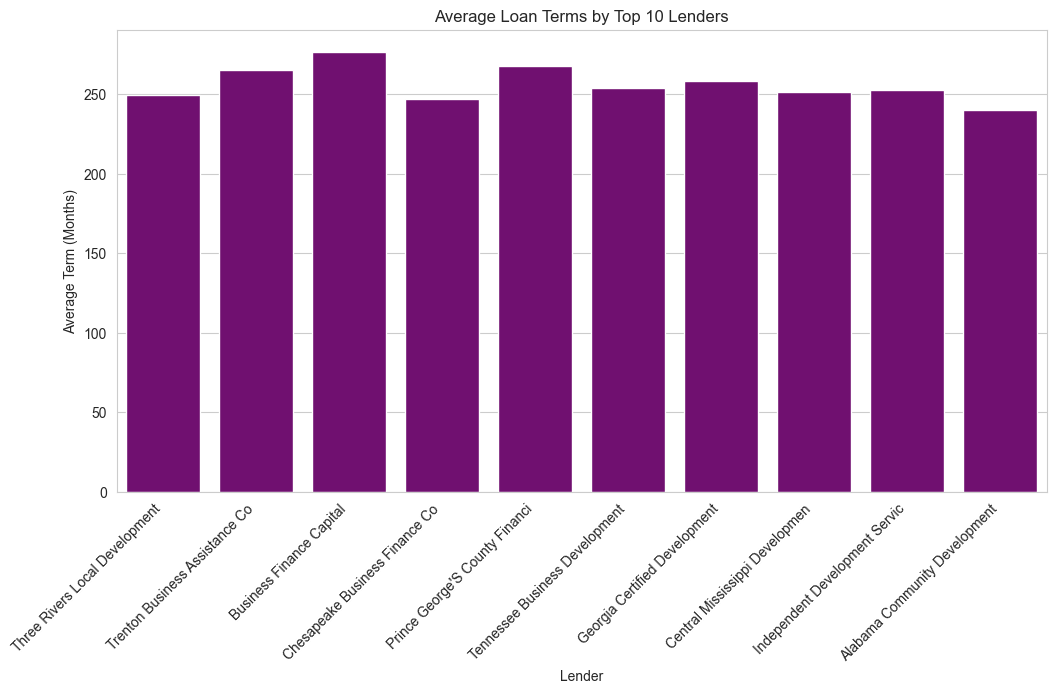

In [26]:
# Loan amounts and terms by lenders
lender_stats = df4.groupby('CDC_Name').agg({'GrossApproval':'mean', 'TermInMonths':'mean'}).sort_values(by='GrossApproval', ascending=False)

plt.figure(figsize=(12, 6))
plt.gca().yaxis.set_major_formatter(formatter)
sns.barplot(x=lender_stats.head(10).index, y='GrossApproval', data=lender_stats.head(10))
plt.title('Average Loan Amount by Top 10 Lenders')
plt.ylabel('Average Loan Amount')
plt.xlabel('Lender')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=lender_stats.head(10).index, y='TermInMonths', data=lender_stats.head(10), color='purple')
plt.title('Average Loan Terms by Top 10 Lenders')
plt.ylabel('Average Term (Months)')
plt.xlabel('Lender')
plt.xticks(rotation=45, ha='right')
plt.show()

## What is the default rate on 504 loans, and how does it vary by industry or loan size?

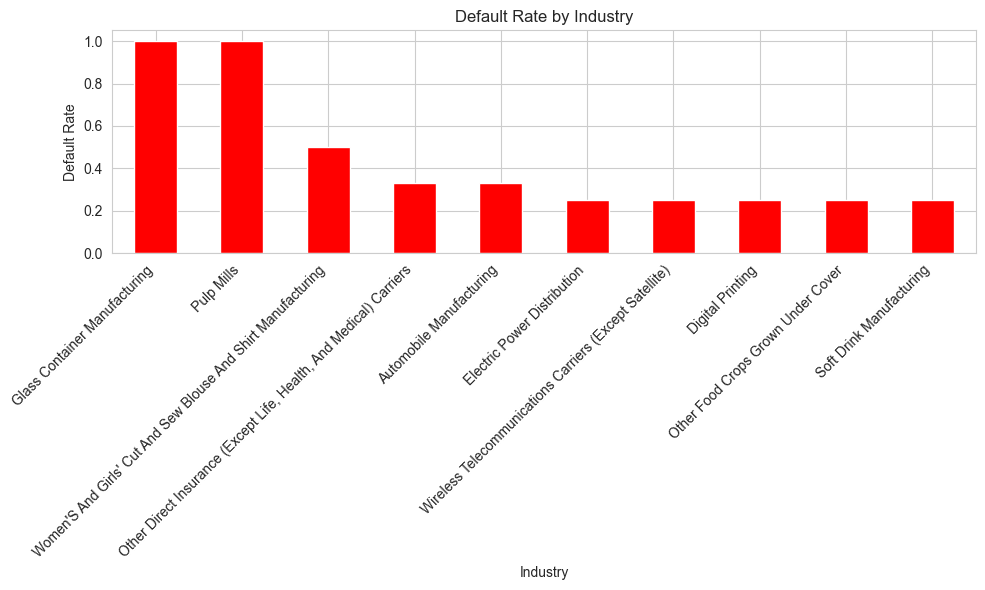

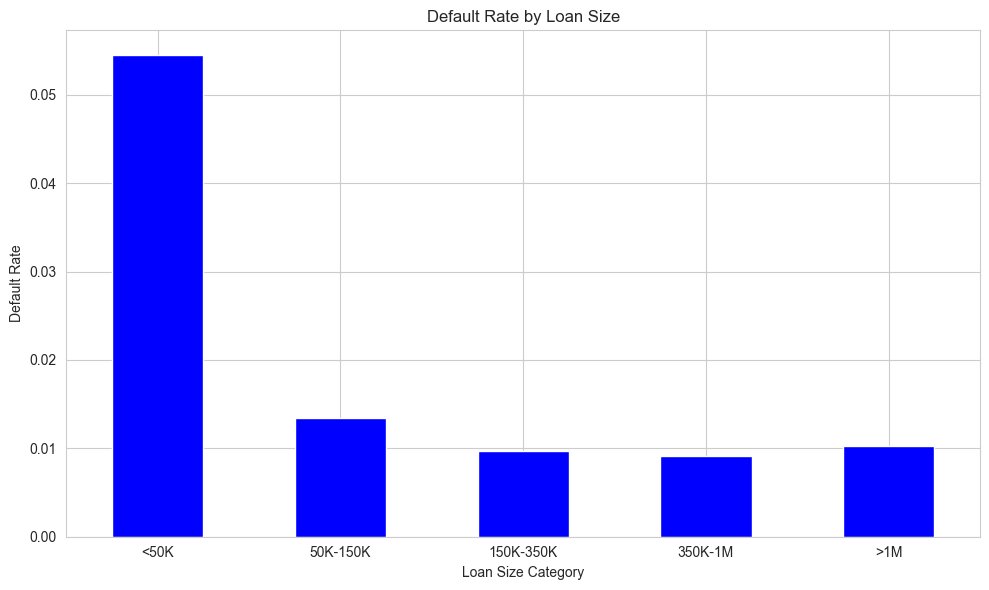

In [27]:
# Default rate by industry
industry_defaults = df4.groupby('NaicsDescription')['LoanStatus'].apply(lambda x: (x == 'CHGOFF').mean()).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
industry_defaults.plot(kind='bar', color='red')
plt.title('Default Rate by Industry')
plt.ylabel('Default Rate')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Default rate by loan size (categorize loan sizes)
df4['LoanSizeCategory'] = pd.cut(df4['GrossApproval'], bins=[0, 50000, 150000, 350000, 1000000, float('inf')], labels=['<50K', '50K-150K', '150K-350K', '350K-1M', '>1M'])
loan_size_defaults = df4.groupby('LoanSizeCategory')['LoanStatus'].apply(lambda x: (x == 'CHGOFF').mean())

plt.figure(figsize=(10, 6))
loan_size_defaults.plot(kind='bar', color='blue')
plt.title('Default Rate by Loan Size')
plt.ylabel('Default Rate')
plt.xlabel('Loan Size Category')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

In [28]:
df4['LoanStatus'].unique()

array(['PIF', 'EXEMPT', 'CHGOFF'], dtype=object)

In [29]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82103 entries, 0 to 101090
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   AsOfDate                82103 non-null  datetime64[ns]
 1   Program                 82103 non-null  object        
 2   BorrName                82103 non-null  object        
 3   BorrStreet              82103 non-null  object        
 4   BorrCity                82103 non-null  object        
 5   BorrState               82103 non-null  object        
 6   BorrZip                 82103 non-null  int64         
 7   CDC_Name                82102 non-null  object        
 8   CDC_Street              82102 non-null  object        
 9   CDC_City                82102 non-null  object        
 10  CDC_State               82102 non-null  object        
 11  CDC_Zip                 82102 non-null  float64       
 12  ThirdPartyLender_Name   82030 non-null  objec

In [30]:

Geographical Insights:

What are the top states or cities for 504 loans in terms of volume and total loan value?
How does the economic landscape of a region correlate with the number and size of loans?
Are there geographic areas that are underserved or overrepresented in the dataset?
Loan Performance:

What is the default rate on 504 loans, and how does it vary by industry or loan size?
Are there predictors of loan default or success among the variables provided?
Comparative Analysis:

How do 504 loans compare to other SBA loan programs (like 7(a) loans) in terms of size, term, and purpose?
Are there notable differences in the application or approval process across different loan programs?
Economic Impact:

How do changes in economic conditions (e.g., interest rates, unemployment rates) impact the number and size of 504 loans?
Can we identify economic sectors that are more resilient or more vulnerable based on loan data?
Policy Effectiveness:

How effective are 504 loans in achieving their intended goal of job creation and economic development?
Have there been changes in policy that significantly impacted the 504 loan program's reach or effectiveness?

SyntaxError: invalid syntax (2240783335.py, line 1)